In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns#To visualization purpose

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score,confusion_matrix, classification_report, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df = pd.read_csv('Pulsesurvey_New.csv')
df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Interest,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income
0,1962,2,1,4,4,2,0,3,2,2,...,1,1,1,2,2,2,2,1,-88,-88
1,1941,1,1,1,5,1,0,1,2,2,...,3,3,2,-99,2,2,2,2,-88,4
2,1951,2,1,1,4,3,0,3,2,2,...,3,2,2,2,2,2,2,1,-88,-99
3,1978,1,1,2,3,1,4,2,1,2,...,1,2,1,1,2,2,2,3,-99,3
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [4]:
indexNames = df[df['Getvacc'] == 3].index
indexNames2 = df[df['Getvacc'] == 2].index

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

df['binary']=df['Getvacc'].apply(lambda x: 0 if(x==4) else(1))
df['Birthyear_bins'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011])
df['Birthyear_codes'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011], labels=[1,2,3,4,5,6])

In [5]:
df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
1,1941,1,1,1,5,1,0,1,2,2,...,-99,2,2,2,2,-88,4,1,"(1931, 1951]",1
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1981, 1991]",5
6,1956,1,1,1,7,1,0,1,2,2,...,1,2,2,2,2,-88,4,1,"(1951, 1961]",2
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
10,1969,2,1,1,6,3,1,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1961, 1971]",3


In [6]:
df_new = df[(df['Education']>0) & (df['Expensdiff']>0) & (df['Income']>0) & (df['Kindwork']>0) & (df['Numkid']>0)]
df_new.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
13,1982,2,1,4,3,1,5,4,2,2,...,1,2,2,2,3,-99,6,0,"(1981, 1991]",5
25,1981,2,1,1,4,1,2,1,1,2,...,2,2,2,2,2,-99,5,1,"(1971, 1981]",4
37,1973,1,2,1,4,1,1,1,2,2,...,2,2,1,2,2,-88,8,1,"(1971, 1981]",4
50,1979,2,1,2,6,3,1,1,2,2,...,-99,2,2,2,3,-99,4,1,"(1971, 1981]",4


In [7]:
dim=df_new.shape
print('Dimensions of the data set are',dim)

Dimensions of the data set are (13464, 25)


In [8]:
X = df_new[['Birthyear_codes', 'Income', 'Education']]
y = df_new["binary"]

In [9]:
y.value_counts()

1    11597
0     1867
Name: binary, dtype: int64

<AxesSubplot:xlabel='binary', ylabel='count'>

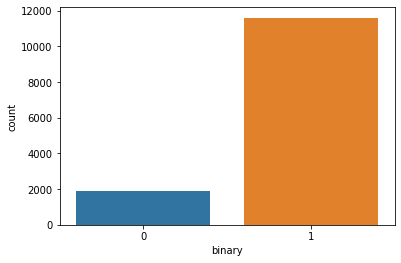

In [10]:
sns.countplot(y)

In [11]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [13]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [14]:
model= LogisticRegression(max_iter=10000)
model.fit(X_train_fs, y_train_enc)
y_pred= model.predict(X_test_fs)

In [15]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)



0.858446519524618

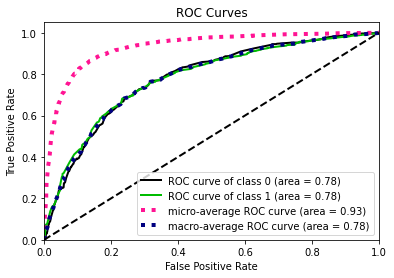

In [17]:
predicted_probas = lr_clf.predict_proba(X_test)
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [18]:
accuracy = accuracy_score(y_test_enc, y_pred)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 86.34


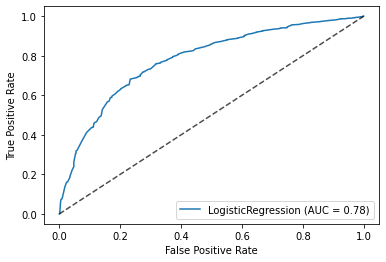

In [19]:
model_disp = plot_roc_curve(model, X_test_fs, y_test_enc)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

In [20]:
print("Accuracy:",accuracy_score(y_test_enc, y_pred))
print("Precision:",precision_score(y_test_enc, y_pred,average='weighted'))
print("Recall:",recall_score(y_test_enc, y_pred,average='weighted'))
print("F1-score:",f1_score(y_test_enc, y_pred,average='weighted'))
print("F beta score is",fbeta_score(y_test, y_pred, beta=2))

Accuracy: 0.8633663366336634
Precision: 0.816890094220448
Recall: 0.8633663366336634
F1-score: 0.8184137269742653
F beta score is 0.9611845407395013


In [21]:
class_lbls=df_new['binary'].unique()
class_labels=[]
for x in class_lbls:
    class_labels.append(str(x))
print('Class labels are:')
print(class_labels)
print("Classififcation report is:")
print(classification_report(y_test,y_pred,target_names=class_labels))

Class labels are:
['1', '0']
Classififcation report is:
              precision    recall  f1-score   support

           1       0.46      0.08      0.13       545
           0       0.87      0.99      0.93      3495

    accuracy                           0.86      4040
   macro avg       0.67      0.53      0.53      4040
weighted avg       0.82      0.86      0.82      4040



In [22]:
print("Confusion matrix is:")
print(confusion_matrix(y_test_enc, y_pred))

Confusion matrix is:
[[  41  504]
 [  48 3447]]


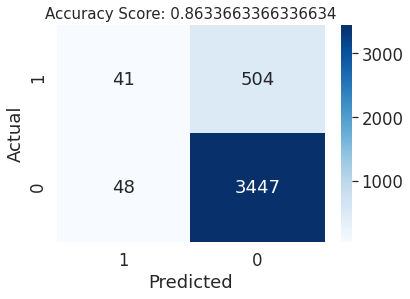

In [23]:
#Printing Confusion matrix
cm=confusion_matrix(y_test_enc,y_pred)
df_cm = pd.DataFrame(cm, columns=class_labels, index = class_labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,cmap="Blues",fmt='d')
score=accuracy_score(y_test_enc, y_pred)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);